In [1]:
## load package

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import time

In [23]:
## KNN Algorithm

def knn(x_text, x_train, y_train, k=1):
    
    # In this case, we adopted Euclidean distance
    # x_test is 1xd vector
    # x_train is nxd matrix, where n is the number of sample
    # y_train is nx1 matrix, a label matrix
    
#     dis = np.sum((x_test - x_train)**2, axis=1)
    dis = np.zeros(x_train.shape)
    for i in range(x_train.shape[0]):
        dis[i,:] = x_test - x_train[i,:]
    dis = np.sum(dis**2,axis=1)
    index_list = np.argsort(dis)
    k_condidate = y_train[index_list[:k]].ravel()
    vote_dic = {}
    
    for i in k_condidate:
        if i not in vote_dic.keys():
            vote_dic[i] = 1
            break
        vote_dic.has_key[i] += 1
    
    pred_y, temp_vote =0, 0
    for key, vote in vote_dic.items():
        if vote > temp_vote:
            pred_y = key
            temp_vote = vote
            
    return pred_y

In [3]:
## Compute the vote list
def vote_comp(k_condidate):
    vote_dic = {}
    
    for i in k_condidate:
        if i not in vote_dic.keys():
            vote_dic[i] = 1
            break
        vote_dic.has_key[i] += 1
    
    pred_y, temp_vote =0, 0
    for key, vote in vote_dic.items():
        if vote > temp_vote:
            pred_y = key
            temp_vote = vote
    return pred_y

In [4]:
### Create a hash table

class HashTable:
    
    def __init__(self, hash_size, input_dimensions):
        self.hash_size = hash_size
        self.hash_dimensions = input_dimensions
        self.hash_table = dict()
        self.projections = np.random.randn(hash_size, input_dimensions)
        
    def generate_hash(self, input_vec):
        code = (np.dot(input_vec, self.projections.T)>0).astype('int')
        return ''.join(code.astype('str'))
    
    def setitem(self, input_vec, label):
        hash_code = self.generate_hash(input_vec)
        data = np.concatenate((input_vec, label))
        self.hash_table[hash_code] = self.hash_table.get(hash_code, list()) + [data]
    
    def getitem(self, input_vec):
        hash_code = self.generate_hash(input_vec)
        return self.hash_table.get(hash_code, [])

In [5]:
## Local sensitive hash

class LSH:
    def __init__(self, num_table, hash_size, input_dimensions):
        self.num_table = num_table
        self.hash_size = hash_size
        self.input_dimensions = input_dimensions
        self.table_list = list()
        for i in range(num_table):
            self.table_list.append(HashTable(self.hash_size, self.input_dimensions))
    
    def setitem(self, input_vec, label):
        for table in self.table_list:
            table.setitem(input_vec, label)
    
    def getitem(self, input_vec):
        res_dict = dict()
        for num, table in enumerate(self.table_list):
            res_dict[num] = np.array(table.getitem(input_vec))
        return res_dict

In [27]:
## Create Training dataset
## multinormal gausian distribuiton with mu1=5, mu2=10, var=3, var=1

mu1, mu2 = 5, 10
cov1, cov2 = 3, 1

x_train_1 = (mu1+np.random.randn(100000, 1000))*cov1
x_train_2 = (mu2+np.random.randn(100000, 1000))*cov2
y_train_1 = np.ones((1, x_train_1.shape[0]))
y_train_2 = np.zeros((1, x_train_2.shape[0]))

x_train = np.vstack((x_train_1, x_train_2))
y_train = np.hstack((y_train_1, y_train_2))

x_test = (mu1+np.random.randn(1,1000)) *cov1

In [28]:
y_train.shape

(1, 200000)

In [29]:
## create a hash table with code length 4
lsh = LSH(num_table=3, hash_size=4, input_dimensions=1000)
for i in range(x_train.shape[0]):
    lsh.setitem(x_train[i,:], y_train[:,i])

In [30]:
result = lsh.getitem(x_test[0,:])
pred_result = list()
for key in result.keys():
    data, label = result[key][:,:-1], result[key][:,-1].reshape(result[key][:,-1].shape[0], 1)
    pred_result.append(knn(x_test, data, label, k=1))
lsh_time_start = time.time()
pred_lsh = vote_comp(pred_result)
lsh_time_end = time.time()

naive_knn_start = time.time()
pred_y = knn(x_test, x_train, y_train.T, k=1)
naive_knn_end = time.time()

print("the search time of LSH is {:3f}, the search time of naive knn is {:3f}".format((lsh_time_end-lsh_time_start)/3, 
                                                                                      (naive_knn_end-naive_knn_start)))

the search time of LSH is 133.101184, the search time of naive knn is 34.508209


In [31]:
(lsh_time_end-lsh_time_start)/3

44.36706129709879

In [73]:
from scipy.stats import multivariate_normal

In [83]:
x = np.linspace(-10,10,1000)
y = multivariate_normal.pdf(x, mean=0, cov=0.5)

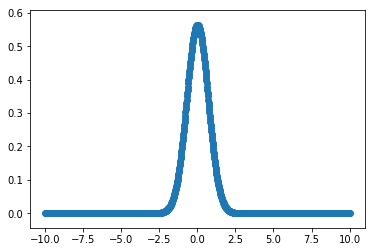

In [84]:
plt.scatter(x,y)
plt.show()

In [87]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contourf(x, y, rv.pdf(pos), cmap='jet')

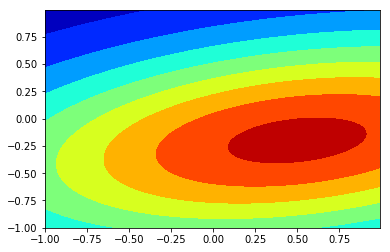

In [88]:
(mean+np.random.randn(1,100))*cov

In [90]:
pos[:,:0], pos[:,:,1]

(array([], shape=(200, 0, 2), dtype=float64),
 array([[-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        ..., 
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99]]))

In [36]:
import math
2^(math.ceil(math.log2(10)))

6